In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

c:\Users\Nishant.Chauhan\XplainableAI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create a dataset

In [2]:
# set random seed

np.random.seed(20)

df = pd.DataFrame(data={
    "knows_python": np.random.choice([0,1],size=1000),
    "knows_genai": np.random.choice([0,1],size=1000)
})

df.head(), df.shape

(   knows_python  knows_genai
 0             1            1
 1             0            1
 2             1            0
 3             1            0
 4             0            0,
 (1000, 2))

In [3]:
# set the target column

df["placement"] = df.any(axis=1).astype(int)

df.head()

,knows_python,knows_genai,placement
0,1,1,1
1,0,1,1
2,1,0,1
3,1,0,1
4,0,0,0


### Train Model

In [4]:
# make X and y

X = df.drop(columns=["placement"])
y = df["placement"]

# split the data

X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [5]:
# fit model on dataset

gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.05, random_state=42)

gb.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,10
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [6]:
# get the predictions

y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [7]:
# calculate the accuracy
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


## Apply shap on the dataset

#### ALL BACKGROUND DATA

In [8]:
background_data_all = X_train

In [9]:
X_test

,knows_python,knows_genai
805,1,1
910,1,0
258,0,0
55,1,1
75,1,0
...,...,...
65,1,1
484,0,1
214,1,0
178,0,1


In [11]:
# extract rows from test data

row_1 = X_test.loc[[805], :]

row_2 = X_test.loc[[910], :]

row_3 = X_test.loc[[484], :]

row_4 = X_test.loc[[258], :]

In [13]:
rows_list = [row_1, row_2, row_3, row_4]

rows_list

[     knows_python  knows_genai
 805             1            1,
      knows_python  knows_genai
 910             1            0,
      knows_python  knows_genai
 484             0            1,
      knows_python  knows_genai
 258             0            0]

In [14]:
# make the explainer

explainer = shap.TreeExplainer(model=gb,
                               data=background_data_all,
                               model_output="probability")

In [15]:
# print the base value

explainer.expected_value

np.float64(0.7343836608007343)

In [16]:
# shap values for the first row

shap_values = explainer(row_1)

shap_values

.values =
array([[0.05233757, 0.05233757]])

.base_values =
array([0.73438366])

.data =
array([[1, 1]])

In [17]:
# print the results

display(row_1)
print()
print(f"Row prediction: {gb.predict(row_1).item()}")
print(f"Row prediction: {gb.predict_proba(row_1).item(1)}")
print()
print(f"Base Value: {shap_values.base_values.item()}")
print(f"Shap Values (knows_python, knows_genai): {shap_values.values.ravel()}")

,knows_python,knows_genai
805,1,1



Row prediction: 1
Row prediction: 0.8390588094382317

Base Value: 0.7343836608007343
Shap Values (knows_python, knows_genai): [0.05233757 0.05233757]


In [18]:
shap_values[0]

.values =
array([0.05233757, 0.05233757])

.base_values =
np.float64(0.7343836608007343)

.data =
array([1, 1])

In [19]:
gb.predict_proba(background_data_all)[:,1].mean()

np.float64(0.731867431266179)

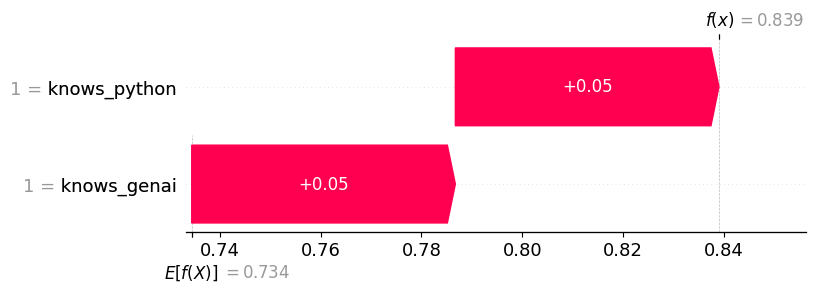

In [20]:
# plot the waterfall plot

shap.plots.waterfall(shap_values[0])

In [21]:
def calculate_and_plot_shap(background_data, test_case):
    
    # make explainer
    explainer = shap.TreeExplainer(model=gb,
                                data=background_data,
                                model_output="probability")
    
    # calculate shap values
    shap_values = explainer(test_case)

    # display
    display(test_case)
    print()
    print(f"Row prediction: {gb.predict(test_case).item()}")
    print(f"Row prediction: {gb.predict_proba(test_case).item(1)}")
    print()
    print(f"Base Value: {shap_values.base_values.item()}")
    print(f"Shap Values (knows_python, knows_genai): {shap_values.values.ravel()}")
    
    # plot waterfall plot
    shap.plots.waterfall(shap_values[0])

,knows_python,knows_genai
805,1,1



Row prediction: 1
Row prediction: 0.8390588094382317

Base Value: 0.7343836608007343
Shap Values (knows_python, knows_genai): [0.05233757 0.05233757]


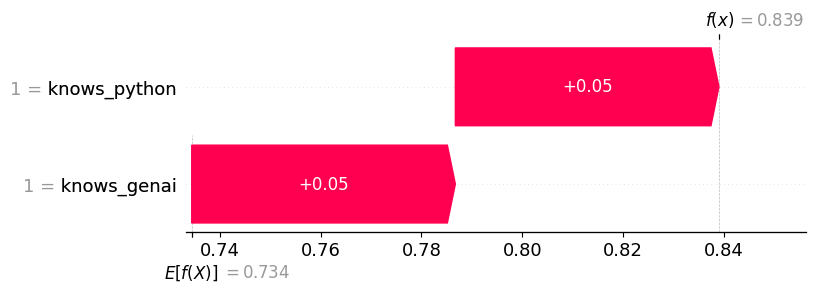

In [22]:
calculate_and_plot_shap(background_data_all, row_1)

ROW NUMBER: 1


,knows_python,knows_genai
805,1,1



Row prediction: 1
Row prediction: 0.8390588094382317

Base Value: 0.7343836608007343
Shap Values (knows_python, knows_genai): [0.05233757 0.05233757]


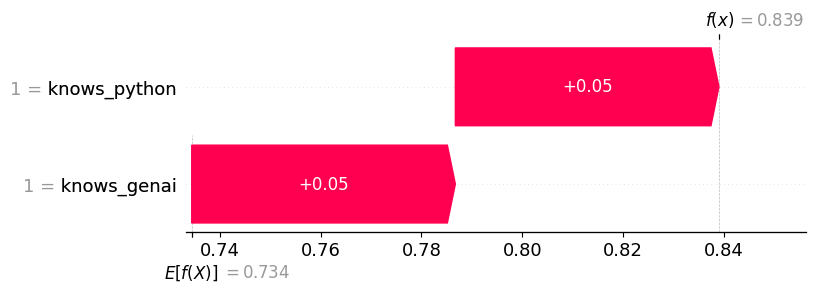



ROW NUMBER: 2


,knows_python,knows_genai
910,1,0



Row prediction: 1
Row prediction: 0.8390588094382317

Base Value: 0.7343836608007343
Shap Values (knows_python, knows_genai): [ 0.31442038 -0.20974523]


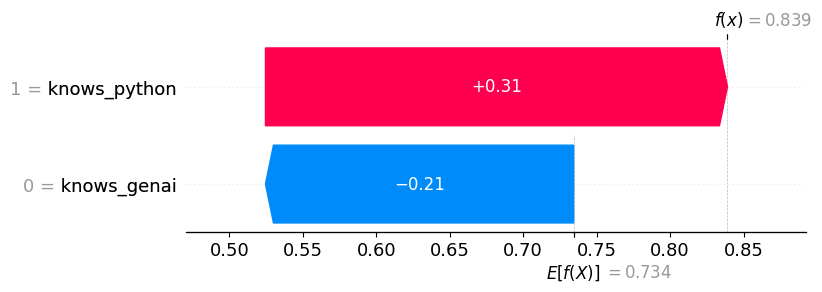



ROW NUMBER: 3


,knows_python,knows_genai
484,0,1



Row prediction: 1
Row prediction: 0.8390588094382315

Base Value: 0.7343836608007343
Shap Values (knows_python, knows_genai): [-0.26694848  0.37162363]


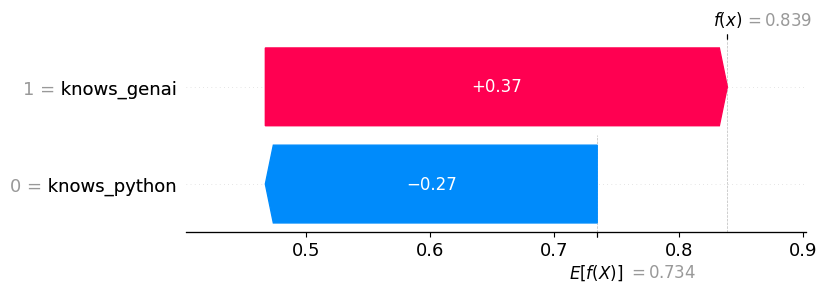



ROW NUMBER: 4


,knows_python,knows_genai
258,0,0



Row prediction: 0
Row prediction: 0.43646208390939595

Base Value: 0.7343836608007343
Shap Values (knows_python, knows_genai): [-0.16103869 -0.13688288]


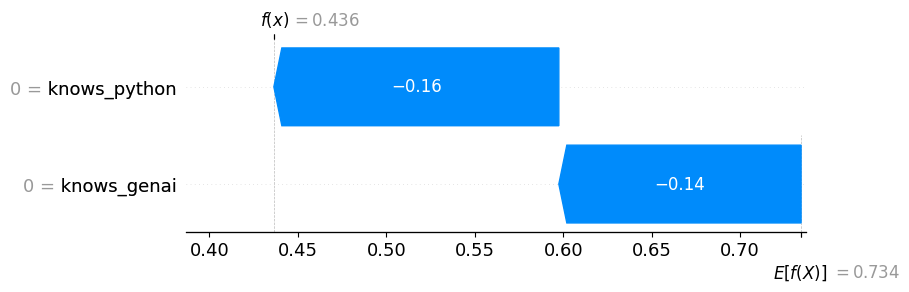

In [23]:
for num, row in enumerate(rows_list, start=1):
    print(f"ROW NUMBER: {num}")
    calculate_and_plot_shap(background_data_all, row)
    print("\n")

### ONLY POSITIVE BACKGROUND DATA

In [24]:
background_data_pos = X_train.loc[y_train == 1, :]

ROW NUMBER: 1


,knows_python,knows_genai
805,1,1



Row prediction: 1
Row prediction: 0.8390588094382317

Base Value: 0.8390588094382315
Shap Values (knows_python, knows_genai): [0. 0.]


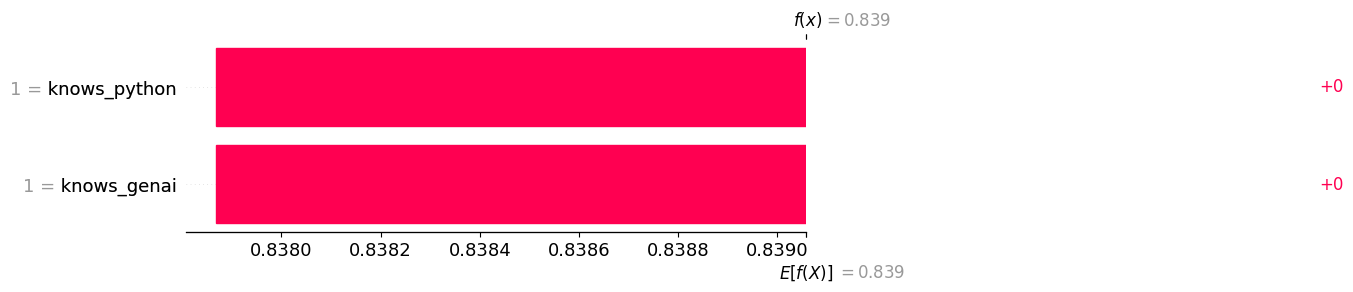



ROW NUMBER: 2


,knows_python,knows_genai
910,1,0



Row prediction: 1
Row prediction: 0.8390588094382317

Base Value: 0.8390588094382315
Shap Values (knows_python, knows_genai): [ 0.31461785 -0.31461785]


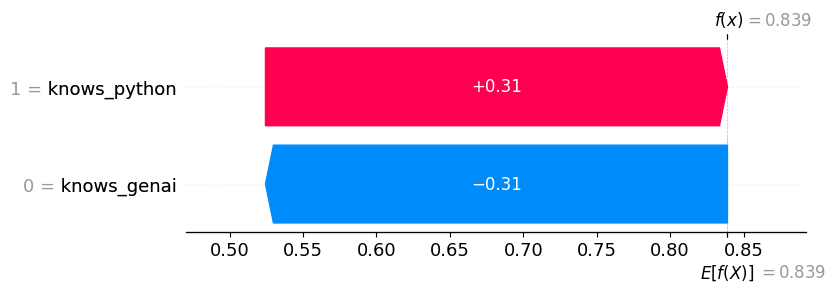



ROW NUMBER: 3


,knows_python,knows_genai
484,0,1



Row prediction: 1
Row prediction: 0.8390588094382315

Base Value: 0.8390588094382315
Shap Values (knows_python, knows_genai): [-0.24788073  0.24788073]


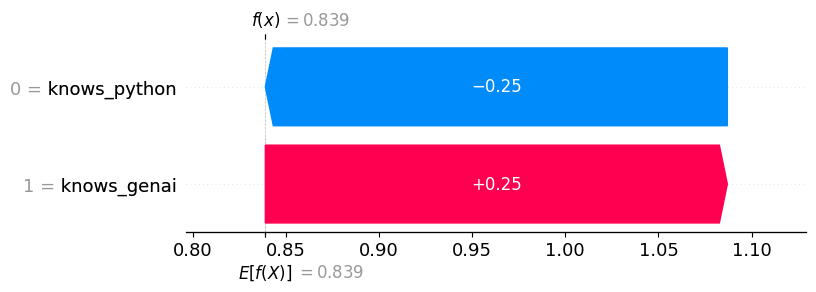



ROW NUMBER: 4


,knows_python,knows_genai
258,0,0



Row prediction: 0
Row prediction: 0.43646208390939595

Base Value: 0.8390588094382315
Shap Values (knows_python, knows_genai): [-0.18720747 -0.21538924]


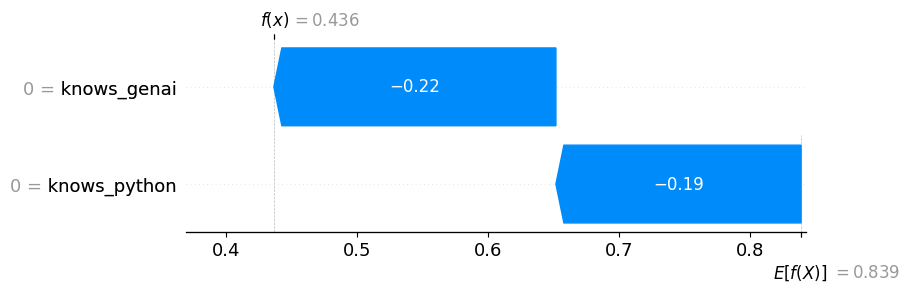

In [25]:

for num, row in enumerate(rows_list, start=1):
    print(f"ROW NUMBER: {num}")
    calculate_and_plot_shap(background_data_pos, row)
    print("\n")

### ONLY NEGATIVE BACKGROUND DATA

In [26]:
background_data_neg = X_train.loc[y_train == 0, :]